# Import Image

In [66]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from Noise3 import generate_fractal_noise_2D

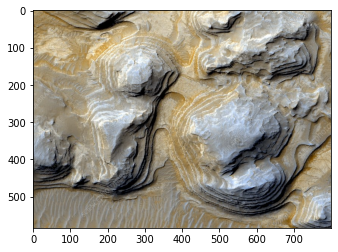

In [175]:
img = cv2.imread('images/mars.jpg')
plt.imshow(img)

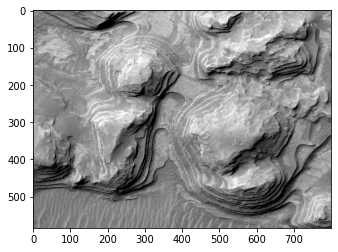

In [176]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [205]:
resized = cv2.resize(gray, (100,100))
print(resized)

[[139 142 139 ... 118 130 152]
 [140 132 123 ... 124 149 170]
 [133 123 118 ... 172 183 128]
 ...
 [108 126 110 ...  61  85  82]
 [107 138 113 ... 106 101 107]
 [112 141 110 ...  74  27   4]]


# Mesh generation

In [117]:
from solid import *
from viewscad import Renderer

renderer = Renderer(openscad_exec ='C:\Program Files\OpenSCAD\openscad.exe')
meshgenfile = import_scad('./genmesh.scad')

In [199]:
#P1 = generate_mesh_cp(noise_hm + 10)
normalized = scaleup(resized,10,50)
P2 = meshgenfile.surfaceData(normalized, center=True)
renderer.render(P2)

In [191]:
normalized_inv = scaleup(resized_inv,10,40)
P3 = meshgenfile.surfaceData(normalized_inv, center=True)
renderer.render(P3)

# Generate Noise

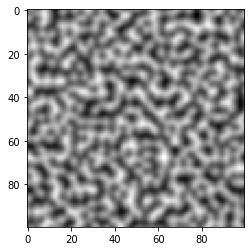

In [169]:
size = 100
noise_hm = generate_fractal_noise_2D((size,size),(10,10),2, 10)
plt.imshow(noise_hm, cmap='gray')

In [133]:
noise_hm

array([[ 0.        , -0.06526015, -0.13448547, ...,  0.16957658,
         0.10621838,  0.05026261],
       [ 0.03050148, -0.03482952, -0.10463986, ...,  0.1172633 ,
         0.05381208, -0.0021265 ],
       [ 0.06671592,  0.00145833, -0.06872789, ...,  0.05697808,
        -0.00599014, -0.06137707],
       ...,
       [ 0.23649971,  0.22679893,  0.21425016, ...,  0.22796857,
         0.20019543,  0.15862855],
       [ 0.14984257,  0.1402978 ,  0.12880434, ...,  0.20601331,
         0.17690162,  0.13370722],
       [ 0.07157703,  0.06219408,  0.0517588 , ...,  0.17059242,
         0.14067326,  0.09670549]])

In [170]:
def scaleup(a, minn, maxx):
    return np.interp(a,(a.min(), a.max()), (minn, maxx))

scaled_noise = scaleup(noise_hm, 10, 40)

In [171]:
P2 = meshgenfile.surfaceData(scaled_noise, center=True)
renderer.render(P2)

# Frequency Analysis

In [12]:
import matlab.engine
eng = matlab.engine.start_matlab()

In [25]:
normalized

array([[16.6, 21. , 22.2, ..., 20.2, 16.4, 15.4],
       [17.4, 18.6, 19.8, ..., 18. , 18.4, 15.6],
       [19.2, 19.6, 23.4, ..., 17.2, 20. , 17.8],
       ...,
       [22.4, 26.6, 25.6, ..., 15.2, 20.2, 16. ],
       [25.8, 18.6, 19.4, ..., 16.4, 16. , 18. ],
       [24. , 16. , 16.6, ..., 17.2, 15. , 18.2]])

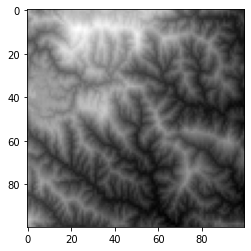

In [155]:
plt.imshow(normalized, cmap='gray')

In [202]:
Y1 = (eng.fft2(matlab.double(normalized_inv.tolist())))
eng.imagesc(eng.abs(eng.fftshift(Y1)))

In [203]:
Y2 = (eng.fft2(matlab.double(noise_hm.tolist())))
eng.imagesc(eng.abs(eng.fftshift(Y2)))